# Workshop 2: Machine Learning with Python


<div style="text-align: justify">
This workshop provides an introduction to machine learning by implementing supervised learning and the machine learning library for Python known as scikit-learn. This workshop has been developed using online courses and resources.
</div><br/>

<div style="text-align: justify">
Supervised learning is a sub-branch of machine learning that focuses on the development of predictive models. These models are developed using a supervised learning algorithm that is trained by using data points, also known as labeled data which consists of inputs (values for a feature or predictor variable) paired with their correct outputs (values for a target variable). This data is typically represented in a table structure such as the one shown below taken from the Iris dataset. In the example shown below, the target variable is the species of a flower and the predictor variables are the physical measurements of a flower.
</div><br/>

In [4]:
import pandas as pd

df_iris = pd.read_csv('data/iris.csv')
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<div style="text-align: justify">
Furthermore, learning algorithms are able to learn by searching for patterns in the provided data that correlate with the desired outputs. Once the algorithm has been trained, it is tested by giving it new inputs that were not used during the training phase and verifying if it determines the correct label for the newly presented input data.
</div><br/>

<div style="text-align: justify">
Supervised learning can be divided into two categories according to the type of target variable to be predicted. If the target variable is represented as a category (qualitative variable), then the supervised learning technique will fall into the category known as classification. The main goal of supervised learning based on classification is to develop a predictive model that will find classes in which to place its inputs. An example of a problem that requires classification is determining whether an email is spam or not. Some of the most commonly used learning algorithms for classification are: Linear classifiers, support vector machines, decision trees, k-nearest neighbor, and random forest. From another point of view, if the target variable is represented as a continuous number (quantitive variable), then the supervised learning technique will fall into the category known as regression. The main goal of supervised learning based on regression is to develop a predictive model that will find outputs that are expressed as continuous numbers. An example of a problem that requires regression is determining the future price of a stock in the New York Stock Exchange. Some of the most commonly used learning algorithms for regression are: Linear regression and polynomial regression.
</div><br/>

<div style="text-align: justify">
The following content in this workshop will discuss the development of different predicitive models using classification and regression while implementing scikit-learn. Additionally, various techniques to evaluate and enhance a predictive model's preformance will be introduced.
</div>

## Chapter 1: Classification

### Exercise 1.1: Which of these is a classification problem?
<div style="text-align: justify">
Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to classification or regression. This exercise will help you develop your intuition for distinguishing between the two. Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?
</div>

Possible Answers
- Option 1: Using labeled financial data to predict whether the value of a stock will go up or go down next week.
- Option 2: Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
- Option 3: Using labeled housing price data to predict the price of a new house based on various features.
- Option 4: Using labeled financial data to predict what the value of a stock will be next week.

### Exercise 1.1: Solution
Option 1

### Exploratory Data Analysis
<div style="text-align: justify">
The first step to developing a predictive model is understanding the data that will be used to train the model. This step is known as exploratory data analysis (EDA). An example of this step can be offered by analyzing the iris dataset which contains data pertaining to iris flowers. The feature variables in this dataset set are: petal lenght, petal width, sepal lenght, and sepal width. Then, the target variable in this dataset is the flower species which can fall into three different categories: versicolor, virginica, or setosa. This dataset can be imported and load from scikit-learn as follows:
</div>

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


<div style="text-align: justify">
In addition, the following libraries will be imported as well to facilitate the tasks of managing files, executing numerical operations, and plotting graphs:
</div>

In [7]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

<div style="text-align: justify">
Going back to the iris dataset, the type for iris is currently Bunch which is similar to a dictionary in that it contains key-value pairs. These keys can be obtained through the following command:
</div>

In [8]:
print(iris.keys())
print(type(iris.data), type(iris.target))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Each key provides the following:
- data: Contains the values for each feature.
- feature_names: Contains features names corresponding to each data point.
- target: Contains the values for each target.
- target_names: Contains target names corresponding to each data point.
- DESCR: Provides a description of the dataset.
- filename: Contains the name of the file from which the dataset was obtained.

Note that both the feature and target data are provided as numpy arrays. Then, through the dot shape attribute of the array feature the number of rows and columns may be identified as follows:

In [9]:
print(iris.data.shape)
print(iris.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


<div style="text-align: justify">
The previously executed commands show the number of rows (150) and columns (4) contained in the feature array and the encoding of the target variable [setosa(0), versicolor(1), and virginica(2)]. Also note that the 4 columns correspond to the 4 features (petal width, petal lenght, sepal lenght, and sepal width) and the 150 rows correspond to the samples for each feature.
</div><br/>

<div style="text-align: justify">
To execute EDA, the feature and target data can be assigned to x and y respectively. Then, a dataframe of the feature data can be built passing column names and the first five rows of the dataframe can be viewed by using the head command. This process is written as follows:
</div>

In [10]:
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


<div style="text-align: justify">
To execute visual EDA, the pandas function known as scatter_matrix may be used to visualize the dataset as follows:
</div>

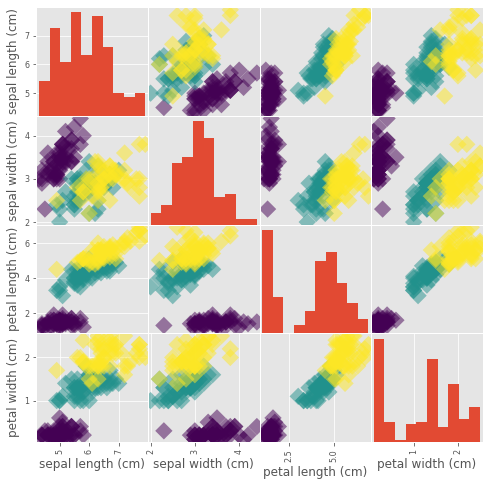

In [7]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s=150, marker='D')
plt.show() # c is color

<div style="text-align: justify">
The previously executed command provides a matrix of figures showing useful information from different perspectives. On the diagonal, the histograms of features corresponding to the row and column may be observed. Then, the off-diagonal figures are scatter plots of the column feature versus row feature colored by the target variable. Through this data visualization we may see that petal length and petal width are highly correlated and that flowers are clustered according to species.
</div>

### Exercise 1.2: Numerical EDA

In [11]:
#Preprocessing dataset obtained from the
#UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen

df = pd.read_csv('data/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

<div style="text-align: justify">
In this exercise, you'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen as shown above. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.
</div><br/>

<div style="text-align: justify">
Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. Get started with your EDA now by exploring this voting records dataset numerically. The dataset has been pre-loaded into a DataFrame called df. You may use pandas' .head(), .info(), and .describe() methods in Jupyter Notebooks to explore the DataFrame, and select the statement below that is not true.
</div>

Possible Answers
- Option 1: The DataFrame has a total of 435 rows and 17 columns.
- Option 2: Except for 'party', all of the columns are of type int64.
- Option 3: The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.
- Option 4: There are 17 predictor variables, or features, in this DataFrame.
- Option 5: The target variable in this DataFrame is 'party'.

### Exercise 1.2: Solution

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [13]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [14]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Answer: Option 4<br/>
The number of columns in the DataFrame is not equal to the number of features. One of the columns (party) is the target variable.

### Exercise 1.3: Visual EDA
<div style="text-align: justify">
The Numerical EDA from the previous exercise offered some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following that exercise with some visual EDA will offer an even better understanding of the data. In the EDA section, the scatter_matrix() function was used on the Iris data for visual EDA. However, in the previous exercise all the features in this dataset were binary (either 0 or 1). Thus, a different type of plot such as Seaborn's countplot would be more useful in this case. To offer an example on how to generate a countplot, the following code may be used to generate a countplot of the 'education' bill:
</div>

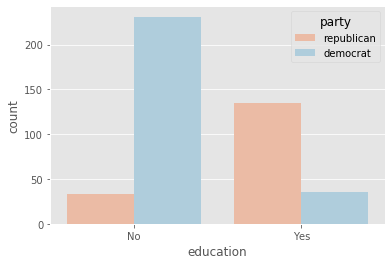

In [15]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

<div style="text-align: justify">
In sns.countplot(), the x-axis data was specified to be 'education', and hue to be 'party'. Recall that 'party' is also the target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. The color was manually specified to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.
</div> <br/>

<div style="text-align: justify">
It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously and certainly not if we are dealing with hundreds of samples!
</div> <br/>

<div style="text-align: justify">
In Jupyter Notebooks, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin the plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, the plots will be overlayed onto the same figure.
</div>

Possible Answers
- Option 1: 'satellite'.
- Option 2: 'missile'.
- Option 3: Both 'satellite' and 'missile'.
- Option 4: Neither 'satellite' nor 'missile'.

### Exercise 1.3: Solution

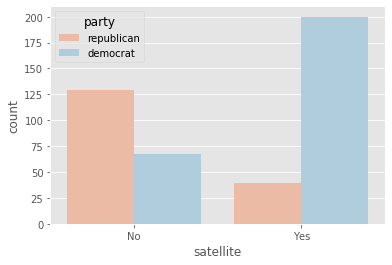

In [16]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

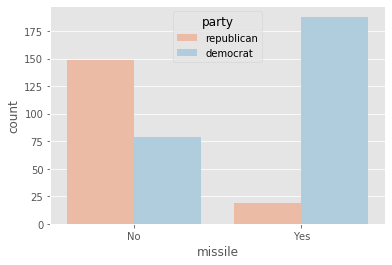

In [17]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Answer: Option 3 <br/>
Feedback: Democrats voted in favor of both 'satellite' and 'missile' bills

### The Classification Challenge
<div style="text-align: justify">
Now we will be buidling our first classifier. To achieve this we must first select a type of classifier and then go through the training and testing process for the classifier. For this example, the learning algorithm that will be used for classification will be k-nearest neighbors (KNN) which predicts the label data of any data point by looking at the 'k' closest labeled data points and getting them to vote on what label the unlabeled point should have. The label for the unlabeled point is then selected according to the majority point.
</div><br/>

<div style="text-align: justify">
To obtain a better understanding for KNN, let's observe the scatter plot of two dimensions of the iris dataset concerning the relation between petal length and petal width. It's important to understand that the following holds for higher dimensions. The 2D case is being discussed for illustrative purposes.
</div>

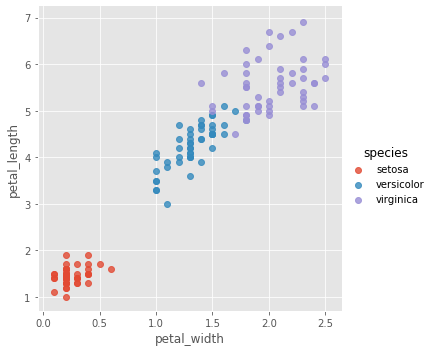

In [18]:
df = sns.load_dataset('iris')
sns.lmplot( x="petal_width", y="petal_length", data=df, fit_reg=False, hue='species', legend=True)

<div style="text-align: justify">
Essentially, the KNN algorithm creates a set of decision boundaries similar to those shown in the image below. If the data point is on top of the first (from top to bottom) boundary, then it will be labeled as virginica. If the data point is between the two boundaries, it will be leabled as versicolor. Finally, if the data point below the second (from top to bottom) boundary, then it will be labeled as setosa.
</div>

# 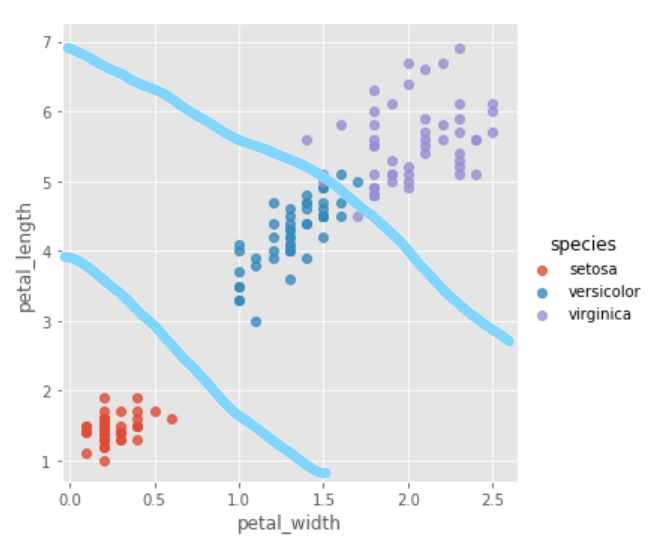

<div style="text-align: justify">
Now that we've obtained a small understanding on how KNN algortihm works, we may proceed with its implementation through scikit-learn. All machine learning models in scikit-learn are implemented as python classes. These classes have two purposes:
</div>

1. Implement the algorithms for learning a model and predicting
2. Store the information learned from the data

<div style="text-align: justify">
The processes of training a model on the data is known as 'fitting' a model to the data. In scikit-learn, the .fit() method is used for fitting. Similarly, the .predict() methos is used to predict the label of an unlabeled data point.
</div><br/>

<div style="text-align: justify">
Now we will fit our first classifier using scikit-learn. To do this, the KKN classifier must be imported from scikit-learn. Then, the KNN classifier must be instantiated by setting the number of neighbors to 6 and assigning its value to knn. Finally, the classifier may be trained by applying the .fit() method and passing it two arguments: the features as a numpy array and the labels as a numpy array. The previously described steps may be written as follows:
</div>

In [19]:
#Importing the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#Instantiating the KNN classifier by setting the number of neighbors to 6 and assigning its value to knn
knn = KNeighborsClassifier(n_neighbors=6)

#Fitting the KNN classifier to the iris dataset
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

<div style="text-align: justify">
It's important to note that the scikit-learn API requires that you have the data as a numpy array or as a pandas dataframe. It also requires that the features take on continuous values and that there are no missing values in the data. The datasets that have been used have satisfied these properties. However, sometimes we may have to deal with categorical features or missing data in which case pre-processing techniques must be applied. This will be discussed later on.
</div><br/>

<div style="text-align: justify">
Furthermore, the scikit-learn API requires that the features are in an array where each columns is a feature an each row is a different observation or data point. Then, looking at the shape of iris 'data' we may observed that there are 150 observations and 4 features. Similarly, the target needs to be a single column with the same number of observations as the feature data as shown below:
</div>

In [20]:
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


<div style="text-align: justify">
From another point of view, observe that after fitting the classifier, the classifier itself was returned along with its modification to fit it to the data. Now the classifier may be used to predict unlabeled data by using a set of unlabeled data as follows:
</div>

In [21]:
#Initiating set of unlabeled data
x_new = np.array([[ 5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2],
                  [ 4.2,  2.8,  1.4,  0.1]])

#Predicting label for unlabeled data
prediction = knn.predict(x_new)

#Printing prediction of the unlabeled dataset: 0-setosa, 1-versicolor, and 2-virginica
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0 0]


<div style="text-align: justify">
Note that once again the scikit-learn API requires that the data is passed as a numpy array with features in columns and observations in rows.
</div>

### Exercise 1.4: k-Nearest Neighbors: Fit
<div style="text-align: justify">
Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset. In the previous section the importance of ensuring your data adheres to the format required by the scikit-learn API was discussed. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice. For this exercise, create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.
</div>

Instructions:
1. Import KNeighborsClassifier from sklearn.neighbors.
2. Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
3. Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
4. Fit the classifier to the data using the .fit() method.

### Exercise 1.4: Solution

In [22]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

#Preprocessing dataset obtained from the
#UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen
df_votes = pd.read_csv('data/house-votes-84.csv',header=None)
df_votes.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df_votes.replace({'n':0,'y':1,'?':0},inplace=True)

# Create arrays for the features and the response variable
X = df_votes.drop('party', axis=1).values #features
y = df_votes['party'].values #target

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### Exercise 1.5: k-Nearest Neighbors: Predict
<div style="text-align: justify">
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data. In the next section, a solution to this problem will be discussed. For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.
</div>

Instructions
1. Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
2. Instantiate a KNeighborsClassifier with 6 neighbors.
3. Fit the classifier to the data.
4. Predict the labels of the training data, X.
5. Predict the label of the new data point X_new.

### Exercise 1.5: Solution

In [23]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing dataset obtained from the
# UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen
df_votes = pd.read_csv('data/house-votes-84.csv',header=None)
df_votes.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df_votes.replace({'n':0,'y':1,'?':0},inplace=True)

# Initiating unlabeled data
X_new = np.array([[ 0.44764519,  0.95034062,  0.43959532,  0.80122238,  0.26844483,
         0.45513802,  0.16595416,  0.56314597,  0.87505639,  0.92836397,
         0.80958641,  0.01591928,  0.0294    ,  0.42548396,  0.65489058,
         0.77928102]])

# Create arrays for the features and the response variable
y = df_votes['party'] #targets
X = df_votes.drop('party', axis=1).values #features

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


### Measuring Model Performance
<div style="text-align: justify">
Now that we know how to fit a classifier and use it to predict the labels of previously unseen data, we need to know how to measure the classifier's performance. Thus, a metric is needed. In classification problems, the most commonly used metric is accuracy which is defined as the number of correct predictions divided by the total number of data point. However, the following question also comes up: Which data do we use to compute accuracy?
</div><br/>

<div style="text-align: justify">
We could use the labeled data that was used for training. However, this will not show how well the model is able to generalize given unseed data. For this is reason, it is common practice to split the labeled data into two sets: a training set and a testing set. The labeled training set is used to train or fit the model and the labeled testing set is used to make predictions with the trained model. Then, the model's predictions are compared with the known labels and the accuracy is calculated.
</div><br/>

<div style="text-align: justify">
To do this, we must first import thw train_test_split function from scikit-learn as follows:
</div>

In [24]:
from sklearn.model_selection import train_test_split

<div style="text-align: justify">    
The train_test_split function will allow us to randomly split our labeled data. The first argument will be the feature data and the second the targets or labels. The test size keyword argument specifies what proportion of the original data is used for the test set. Lastly the random state argument sets a seed for the random number generator that splits the data into train and test. Setting the seed with the same argument later allows you to reproduce the exact split and your downstream results. On the other hand, the function train test split returns four arrays: the training data, the test data, the training labels, and the test labels. We unpack these into four variables: X train, X test, y train, and y test, respectively as shown below.
</div>

In [25]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

<div style="text-align: justify">       
By default, the train test split function splits the data into 75% training data and 25% test data which is a good rule of thumb. However, in this case, the test size was specified by using the keyword argument test size and it was set to 30%. It is also best practice to perform your split so that the split reflects the labels on your data. That is you want the labels to be distinguished in train and test sets as they are in the original dataset. To achieve this, we use the keyword argument stratify equals y, where y is the list or array containing the lables.
</div><br/>

<div style="text-align: justify">       
Then, we instantiate our k-Nearest Neighbor classifier, fit it to the training data using the fit method, make our predictions on the test data, store the results as y_pred, print the test set predictions and calculate the accuracy of our model as shown below.
</div>

In [26]:
#Instantiating k-nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=8)

#Fitting classifier to the training data
knn.fit(X_train, y_train)

#Making predictions on the testing data
y_pred = knn.predict(X_test)

#Printing test set predictions
print("Test set predictions:\n {}".format(y_pred))

#Calculating and printing model accuracy 
accuracy = knn.score(X_test, y_test)
print('\n Model accuracy:', accuracy)

Test set predictions:
 ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat'

<div style="text-align: justify">   
Concerning the KNN classifier, it's important to note that as k is increased, the decision boundary will get smoother and less curvy. Therefore, it will create a less complex model than those with a lower k. Generally, complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data. This problem is known as overfitting. On the other hand, if you increase k even more and make the model even simpler, then the model will perform less well on both test and training sets. This problem is known as underfitting.
</div>

### Exercise 1.6: The Digits of Recognition Dataset
<div style="text-align: justify">   
Up until now, you have been performing binary classification, since the target variable had two possible outcomes. However, in the previous section, multi-class classification where the target variable could take on three possible outcomes was discussed. In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9. A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.
</div><br/>

<div style="text-align: justify">   
Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels. Also notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].
</div><br/>

Instructions
1. Import datasets from sklearn and matplotlib.pyplot as plt.
2. Load the digits dataset using the .load_digits() method on datasets.
3. Print the keys and DESCR of digits.
4. Print the shape of images and data keys using the . notation.
5. Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

### Exercise 1.6: Solution

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlappin

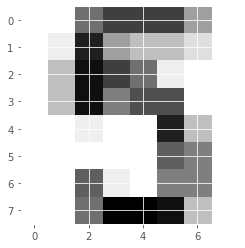

In [27]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print('\n', digits['DESCR'], '\n')

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Exercise 1.7: Train/Test Spilt + Fit/Predict/Accuracy
<div style="text-align: justify">   
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset. After creating arrays for the features and target variable, you will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy using the .score() method.
</div>

Instructions
1. Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
2. Create an array for the features using digits.data and an array for the target using digits.target.
3. Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
4. Create a k-NN classifier with 7 neighbors and fit it to the training data.
5. Compute and print the accuracy of the classifier's predictions using the .score() method.

### Exercise 1.7: Solution

In [28]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits['data']
y = digits['target']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Exercise 1.8: Overfitting and Underfitting
<div style="text-align: justify">   
You will now construct model complexity curve for the digits dataset. In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.
</div>

<div style="text-align: justify">   
The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.
</div>

Instructions for what to write inside the for loop:
1. Setup a k-NN classifier with the number of neighbors equal to k.
2. Fit the classifier with k neighbors to the training data.
3. Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

### Exercise 1.8: Solution

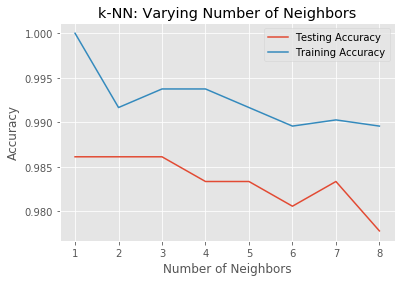

In [29]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits['data']
y = digits['target']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<div style="text-align: justify">
Feedback: It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter.
</div>

## Chapter 2: Regression

### Introduction to regression

<div style="text-align: justify">
Now we are going to discuss another type of surpervised learning problem known as regression. In the regression task, the target variable is a countinously varying variable such as a stock price or a country's GDP. The first regression example that will be shown by using the Boston housing dataset.
</div><br/>

<div style="text-align: justify">
First, the dataset must be loaded from the csv using pandas' read csv function. A preview of the loaded data can then be obtained by using the .head() method as shown below:
</div>

In [30]:
# Boston housing data
boston = pd.read_csv('data/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<div style="text-align: justify">
The boston dataset contains 14 columns which are:
</div>

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: percentage lower status of the population
14. MEDV: median value of owner-occupied homes in 1000's of dollars

<div style="text-align: justify">
Out of these 14 columns, the target variable is MEDV. Thus, the boston dataset contains 13 feature variables. Then, given the dataset we want to split our current dataframe into target and features as follows:
</div>

In [31]:
X = boston.drop('MEDV', axis=1).values #values for feature variables
y = boston['MEDV'].values #values for target variable

<div style="text-align: justify">
As a first task, we will try to predict the price from a single feature; the average number of rooms in a block. To do this, we slice out the 5th column of the dataframe X, which is the number of rooms column, into the variable X_rooms as follows:
</div>

In [32]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

<div style="text-align: justify">
Checking the type of X_rooms and y, we may see that both are numpy arrays. Then, to turn them into numpy arrays of the desired shape, we apply the .reshape() method to keep the first dimension and add another dimension of size one to X as shown below:
</div>

In [33]:
print(y.shape)
y = y.reshape(-1, 1)
print(y.shape)
print(X_rooms.shape)
X_rooms = X_rooms.reshape(-1, 1)
print(X_rooms.shape)

(506,)
(506, 1)
(506,)
(506, 1)


<div style="text-align: justify">
Now, we will plot house value as a function of the number of rooms using matplotlib's plt .scatter() method.
</div>

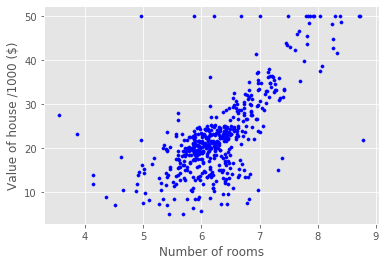

In [34]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting house value vs. number of rooms
plt.scatter(X_rooms, y, s=10, c='blue')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

<div style="text-align: justify">
As expected, the previously plotted graph shows that more rooms lead to higher prices. Now we will fit a regression model to our data using a model called linear regression and plot its predictions. To do this, we import the linear model from scikit-learn, numpy as np, and instantiate the Linear Regression model as reg. Then, the regression is fit to the data using reg.fit() and passing in the feature variable (number of rooms) and the target variable (house price) as arguments. After writing this command, the regressor's predictions are verified over the range of the data. This can be achieved by using np.linspace to create a linear space between the maximum and minimum number of rooms and making a prediction for this data. The results of this prediction may be observed through the scatter plot below. The previously described process can be written as follows:
</div><br/>

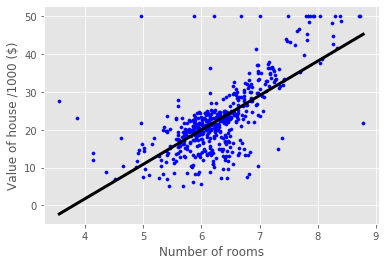

In [35]:
# Importing numpy and linear regression model
import numpy as np
from sklearn import linear_model

# Instantiating linear regression model as reg
reg = linear_model.LinearRegression()

# Fitting regression model 
reg.fit(X_rooms, y)

# Creating linear space between the maximum and minimum number of rooms
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

# Plotting prediction line along with scatter plot of the data
plt.scatter(X_rooms, y, color='blue', s=10)
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

### Exercise 2.1: Which of the following is a regression problem?
<div style="text-align: justify">
The previous section introduced regression by using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems. Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.
</div><br/>

Possible Answers:
- Option 1: An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.
- Option 2: A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.
- Option 3: A restaurant using review data to ascribe positive or negative sentiment to a given review.
- Option 4: A bike share company using time and weather data to predict the number of bikes being rented at any given hour.

### Exercise 2.1: Solution
Option 4

### Exercise 2.2: Importing data for supervised learning
<div style="text-align: justify">
In this chapter, you will work with Gapminder data that has been consolidated into one CSV file called 'gm_2008_region.csv'. Specifically, your task will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.
</div><br/>

<div style="text-align: justify">
Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.
</div><br/>

<div style="text-align: justify">
Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.
</div>

Instructions
1. Import numpy and pandas as their standard aliases.
2. Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
3. Create array X for the 'fertility' feature and array y for the 'life' target variable.
4. Reshape the arrays by using the .reshape() method and passing in -1 and 1.

### Exercise 2.2: Solution

In [36]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


<div style="text-align: justify">
Feedback: Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.
</div>

### Exercise 2.3: Exploring the Gapminder data
<div style="text-align: justify">
As always, it is important to perform EDA before building models. As a result, a heatmap showing the correlation between the different features of the Gapminder dataset has been constructed. This correlation is shown below and is available to be explored using Jupyter Notebooks. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?
</div><br/>

<div style="text-align: justify">
Use Jupyter Notebooks to explore the DataFrame using pandas methods such as .info(), .describe(), .head(). Once you have an understanding for the data, consider the statements below and select the one that is not true.
</div>

Possible Answers:
- Option 1: The DataFrame has 139 samples (or rows) and 9 columns.
- Option 2: life and fertility are negatively correlated.
- Option 3: The mean of life is 69.602878.
- Option 4: fertility is of type int64.
- Option 5: GDP and life are positively correlated.

### Exercise 2.3: Solution

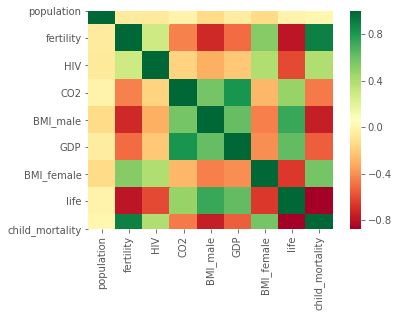

In [37]:
# Exploring the Gapminder data

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [39]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [40]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


Answer: Option 4

### The basics of linear regression
<div style="text-align: justify">
Linear regression works by fitting a line to the data. A line in two dimensions is always in the form:
</div><br/>

<div style="text-align: justify">
y = ax + b,
</div><br/>

<div style="text-align: justify">
where y is the target, x is the single feature, and a and b are the parameters of the model to be learned. Thus, the main question when fitting a regression model is: How do we choose a and b? A common method is to define an error function for any given line and then choose the line that minimizes the error function. This function is also known as loss or cost function.
</div><br/>

<div style="text-align: justify">
Intuitively, we want the line to be as close to the data actual data points as possible. For this reason, we minimize the vertical distance between the fit and the data. Thus, for each data point we calculate the vertical distance, also known as the residual, between it and the line. Having calculated the residuals, we then minimize the sum of the squares of the residuals. This loss function is called ordinary least square (OLS). It's important to note that this is the same as minimizing the mean squared error of the predictions on the training set. When you call .fit() on a linear regression model in scikit-learn, it performs OLS under the hood.
</div><br/>

<div style="text-align: justify">
The case of linear regression in higher dimensions must also be discussed. In this case, we one target and more than two features. Thus, the line is in the following form: 
</div><br/>

<div style="text-align: justify">
y = a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + a<sub>3</sub>x<sub>3</sub> + ... + a<sub>n</sub>x<sub>n</sub> + b
</div><br/>

<div style="text-align: justify">
Thus, fitting a linear regression model in this case is to specify a coefficient a<sub>i</sub>, for each feature, as well as the variable b. For this case, the scikit-learn API work the same as in the previous case where you use the .fit() method and pass two arrays: one containing features and the other the target. An example is shown below using all the features from the Boston Housing dataset.
</div>

In [41]:
# Linear regression on all features

# Boston housing data
boston = pd.read_csv('data/boston.csv')
boston.head()

# Obtaining values for target and features
X = boston.drop('MEDV', axis=1).values #values for feature variables
y = boston['MEDV'].values #values for target variable

# Importing train_test_split function and linear regression model from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting data train set and test set. Selecting 30% of data for test set.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

# Instantiating and fitting regression model
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

# Executing prediction with trained model and calculating its R squared
y_pred = reg_all.predict(X_test)
print('R squared: ', reg_all.score(X_test, y_test))

R squared:  0.7112260057484953


<div style="text-align: justify">
As observed in the example, a value known as R<sup>2</sup> was calculated. R<sup>2</sup> is the default scoring method for linear regression. This metric quantifies the amount of variance in the target variable that is predicted from the feature variables. On the other hand, it's important to note that you will never use linear regression out of the box like this. In most cases, you will include the use regularization to add constraints on the model's coefficients.
</div>

### Exercise 2.4: Fit & predict for regression
<div style="text-align: justify">
Now, you will fit a linear regression and predict life expectancy using just one feature; the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility as shown below.
</div><br/>

In [42]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values.reshape(-1,1)
X_fertility = df['fertility'].values.reshape(-1,1)

<div style="text-align: justify">
Also, a scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated as shown below.
</div>

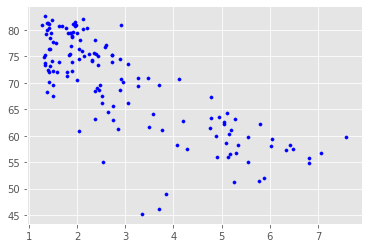

In [43]:
plt.scatter(X_fertility,y,c='blue',s=10);

<div style="text-align: justify">
As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your task is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.
</div>

Instructions
1. Import LinearRegression from sklearn.linear_model.
2. Create a LinearRegression regressor called reg.
3. Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
4. Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
5. Compute and print the R2 score using the .score() method.
6. Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

### Exercise 2.4: Solution

0.6192442167740035


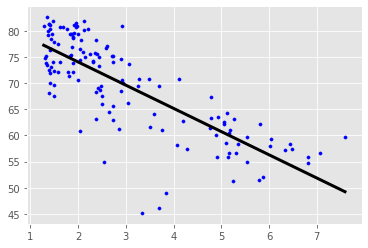

In [44]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X_fertility,y,c='blue',s=10);
plt.show()

### Exercise 2.5: Train/test split for regression
<div style="text-align: justify">
As discussed in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.
</div><br/>

<div style="text-align: justify">
In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R<sup>2</sup> score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.
</div>

Instructions
1. Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
2. Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
3. Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
4. Compute and print the R<sup>2</sup> score using the .score() method on the test set.
5. Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

### Exercise 2.5: Solution

In [45]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gapminder data data
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2433/datasets/gapminder-clean.csv')

# Obtaining values for target and features
y = df['life'].values
X = df.drop('life', axis=1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


### Cross-validation
<div style="text-align: justify">
There is a potential pitfall in the previously implemented process for evaluation model performance. If your computing R<sup>2</sup> on your test data, the R<sup>2</sup> returned is dependent on the way that your split up the data and these data points may not be representative of the model's ability to generalized unseen data. To solve this problem, we use a technique known as cross-validation. These technique may be executed by splitting the dataset into five groups or folds. Then, we hold out the first fold as a test set, fit the model with the remaining four folds, predict on the test set, and compute the metric of interest. Next, we hold out the second fold as a test set, fit the model with the remaining four folds, predict on the test set, and compute the metric of interest once again. This process is called 5-fold cross validation (CV) since it is repeated until all five folds have been used as a test set. As a result, we get five values of R<sup>2</sup> from which we can compute satistics of interest such as mean, median, and 95% confidence intervals. From another point of view, note that if we use k folds instead of 5 folds, the process will be called k-fold CV. Also, note that adding more folds to the process will result in a more computationally expensive process.
</div><br/>

<div style="text-align: justify">
To perform k-fold CV with scikit-learn, we must first import cross_val_score and the regression model from scikit-learn as follows:
</div>

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

<div style="text-align: justify">
Then, we instantiate the regression model and call the cross_val_score function which returns an array of cross-validation R<sup>2</sup> scores. The cross_val_score function receives four arguments: the model, the feature data, the target data, and the number of folds. The results from the cross_val_score function are assigned to cv_results and printed as shown below:
</div>

In [47]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


### Exercise 2.6: 5-fold cross-validation
<div style="text-align: justify">
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.
</div><br/>

<div style="text-align: justify">
In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R<sup>2</sup> as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your task is to compute these 5 scores and then take their average.
</div>

Instructions
1. Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
2. Create a linear regression regressor called reg.
3. Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
4. Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

### Exercise 2.6: Solution

In [48]:
# 5-fold cross-validation

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Gapminder data data
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2433/datasets/gapminder-clean.csv')

# Obtaining values for target and features
y = df['life'].values
X = df.drop('life', axis=1).values

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793407


### Exercise 2.7: K-fold CV comparison
<div style="text-align: justify">
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your task is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset. In Jupyter Notebooks, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:
</div>

- %timeit cross_val_score(reg, X, y, cv = ____)

Instructions
1. Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
2. Create a linear regression regressor called reg.
3. Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

### Exercise 2.7: Solution

In [49]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV

cvscores_3 = cross_val_score(reg, X, y, cv=3) #2.6 ms using %timeit
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10) #9.4 ms using %timeit
print(np.mean(cvscores_10))

0.8718712782622257
0.8436128620131427


### Regularized regression
<div style="text-align: justify">
Recall that fitting a linear regression implies minimizing a loss function to choose a coefficient a<sub>i</sub> for each feature variable. If we allow these coefficients or parameters to be too large, overfitting occurs. Overfitting is not easily observed when dealing with data in two dimensions. However, if the data sits in a high-dimensional space with large coefficients, it gets easy to predict nearly anything. For this reason, it is common practice to alter the loss function so that it penalizes for large coefficients thus, avoiding overfitting. This penalization technique is known as regularization.
</div>

#### Ridge regression
<div style="text-align: justify">
The first type of regularized regression that will be discussed is called ridge regression (also known as L2 regularization) in which the loss function is expressed as follows:
</div><p></p>    

loss function = OLS loss function + $\alpha$$\sum_{i=1}^{n} a_i^2$.

<p></p><div style="text-align: justify">
Thus, when minimizing the loss function to fit to the data, models are penalized for coefficients with a large magnitude (large positive and large negative coefficients). Note that alpha is a parameter that needs to be chosen on order to fit and predict. As a result, the selected alpha will be the value for which the model performs best. Selecting the value for alpha in ridge regression is similar to selecting the value for k in KNN. This task is known as hyperparameter tunning.
</div><br/>

<div style="text-align: justify">
The alpha parameter, which may also be known as lambda, can be seen as a parameter that controls model complexity. When alpha equals 0, the loss function will be equal to the OLS loss function. In this case, large coefficients are not penalized and overfitting may occur. On the other side, a very large alpha means that large coefficients are significantly penalized which can lead to a model that is too simple and underfitting occurs.
</div><br/>

<div style="text-align: justify">
To implement ridge regression, the ridge regression model must be imported from scikit-learn. Then, the same steps to those executed with other regression models is executed: the data is split into test set and train set, the model is fit on the train set, and the model is tested on the test set as shown below.
</div>

In [50]:
# Ridge regression in scikit-learn

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8442469959975749

<div style="text-align: justify">
Note that when instantiating the ridge regression model, the alpha argument was set to 0.1 and normalized argument was set to True. Setting normalized equal to True will ensure that all the variables are on the same scale.
</div>

#### Lasso regression
<div style="text-align: justify">
There is another type of regularized regression called lasso regression (also known as L1 regularization) in which the loss function is expressed as follows:
</div><p></p>

loss function = OLS loss function + $\alpha$$\sum_{i=1}^{n} |a_i|$.

<p></p><div style="text-align: justify">
The method of performing lasso regression using scikit-learn mirrors that of ridge regression as shown below.
</div>

In [51]:
# Lasso regression in scikit-learn

from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.8721296169613538

<div style="text-align: justify">
One of the useful aspects of lasso regression is that it can be used to select important features of a dataset due to the fact that it tends to shrink the coefficients of less important features to be exactly zero. The features whose coefficients are not shrunk to zero are selected by the lasso algorithm. This can be observed through the following example:
</div>

In [52]:
# Obtaining values for feature and target
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

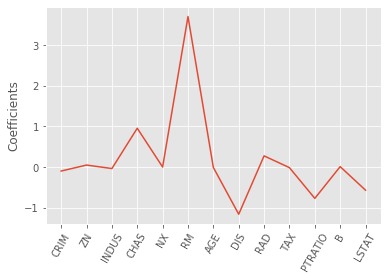

In [53]:
# Importing lasso regression model from scikit-learn
from sklearn.linear_model import Lasso

# Storing feature names in the variable names
names = boston.drop('MEDV', axis=1).columns

# Instantiating lasso model
lasso = Lasso(alpha=0.1)

# Fitting the data and extracting the coef attribute to store in the variable lasso_coef
lasso_coef = lasso.fit(X, y).coef_

# Plotting the coefficients as a function of feature name
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

<div style="text-align: justify">
Through the previous plot we may observe that the most important predictor for the target variable of housing price is the number of rooms.
</div>

### Exercise 2.8: Regularization I - Lasso
<div style="text-align: justify">
In the previous section, the Lasso algorihtm was seen to select out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.
</div><br/>

<div style="text-align: justify">
In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.
</div>

Instructions
1. Import Lasso from sklearn.linear_model.
2. Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
3. Fit the regressor to the data and compute the coefficients using the coef_ attribute.
4. Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!

### Exercise 2.8: Solution

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


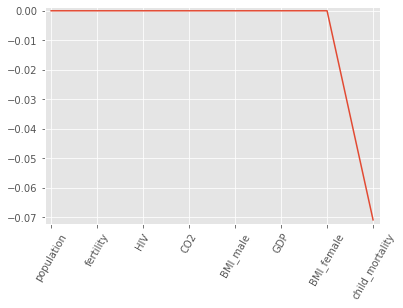

In [54]:
# Importing modules
from sklearn.linear_model import Lasso

# Gapminder data data
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2433/datasets/gapminder-clean.csv')

# Obtaining values for features
y = df['life'].values

# Obtaining columns from dataframe and storing them in df_columns
X = df.drop('life', axis=1)
df_columns = X.columns

# Obtaining values for target
X = X.values

# Instantiating a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fitting the regressor to the data
lasso.fit(X,y)

# Computing and printing the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plotting the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

<div style="text-align: justify">
According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.
</div>

### Exercise 2.9: Regularization II - Ridge
<div style="text-align: justify">
Lasso is great for feature selection, but when building regression models, ridge regression should be your first choice. Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.
</div><br/>

<div style="text-align: justify">
If instead you took the sum of the squared values of the coefficients multiplied by some alpha like in ridge regression you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:
</div><br/>

    def display_plot(cv_scores, cv_scores_std):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(alpha_space, cv_scores)

        std_error = cv_scores_std / np.sqrt(10)

        ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
        ax.set_ylabel('CV Score +/- Std Error')
        ax.set_xlabel('Alpha')
        ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
        ax.set_xlim([alpha_space[0], alpha_space[-1]])
        ax.set_xscale('log')
        plt.show()

<div style="text-align: justify">
Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.
</div>

Instructions
- Instantiate a Ridge regressor and specify normalize=True.
- Inside the for loop:
 - Specify the alpha value for the regressor to use.
 - Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
 - Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
- Use the display_plot() function to visualize the scores and standard deviations.

### Exercise 2.9: Solution

In [55]:
# Function to visualize the scores and standard deviations
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

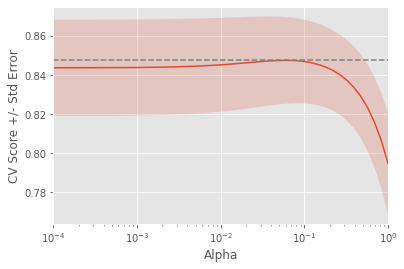

In [56]:
# Importing modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setting up the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Creating a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Computing scores over range of alphas
for alpha in alpha_space:

    # Specifying the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Performing 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Appending the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Appending the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Displaying the plot
display_plot(ridge_scores, ridge_scores_std)

<div style="text-align: justify">
Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? This will be discussed in the next chapter.
</div>

## Chapter 3: Fine-tuning your model

### How good is your model?
<div style="text-align: justify">
In Chapter 1, accuracy was used as a metric to measure the performance of a classification model. However, this is not always the most aprropriate metric to be implemented. For example, consider a spam classification problem in which 99% of the emails are real and 1% are spam. A classifier could be built that predicts all emails as real and thus, would be 99% percent accurate. This sounds goods, but it's actually not since the classifer is not correctly classifying any of the spam emails. This situation in which one class is more frequent than another is called class imbalance and if present, a more refined metric will be required to asses the performance of a classifier model. 
</div><br/>

<div style="text-align: justify">
Given the binary classifier, such as the one that one that would be used in the spam email example, a 2x2 matrix can be drawn that summarizes predictive performance. This matrix is called a confusion matrix. Across the matrix's top are the predicted labels and down the matrix's side are the actual labels. Given any model, the confusion matrix may be filled according to its predictions. An example of the confusion matrix is shown below.
</div>

|                     |Predicted: Spam Email|Predicted: Real Email|
|:-------------------:|:-------------------:|:-------------------:|
|Actual: Spam Email   |True Positive        |False Negative       |
|Actual: Real Email   |False Postive        |True Negative        |

<div style="text-align: justify">
In the top left square, we have the number of spam emails correctly labeled (true positive). In the bottom right square, we have the number of real emails correctly labeled (true negative). In the top right square, we have the number of spam email incorrectly labeled (false negative). Finally, in the bottom left square, we have the number of real emails incorrectly labeled (false positive). Usually, the class of interest is called the positive class. In the spam email case, since we are trying to detect spam, the positive class will be spam.
</div><br/>

<div style="text-align: justify">
There are various reasons for which the confusion matrix is important. First, it facilitates the calculation of accuracy which is the sum of the matrix's diagonal divided by the total sum of the matrix as follows:
</div>

Accuracy = $\frac{tp+tn}{tp+tn+fp+fn}$

<p></p><div style="text-align: justify">
Another metric that may be calculated using the confusion matrix is precision which is the number of true positives divided by the total number of true positives and false positives. This is also called the positive predictive value (PPV) as is expressed as follows:
</div>

Precision or PPV = $\frac{tp}{tp+fp}$

<p></p><div style="text-align: justify">
In the spam email case, the PPV is the number of correctly labeled spam emails divided by the total number of emails classified as spam. High precision means that the classifier had a low false positive rate, in other words, not many real emails were predicted as spam.
</div><br/>

<div style="text-align: justify">
The metric known as recall may also be calculated using the confusion matrix. High recall means that the classifier predicted most positive or spam emails corectly. Recall may also be referred to as sensitivity, hit rate, or true positive rate and may be expressed as follows:
</div>

Recall = $\frac{tp}{tp+fn}$

<p></p><div style="text-align: justify">
On the other hand, there is the F1-score which is defined as two times the product of the precision and recall divided by the sum of the precision and recall. The F1-score is the harmonic mean of the precision and recall and may be espressed as follows:
</div>

F1-score = 2*$\frac{precision*recall}{precision+recall}$

<p></p><div style="text-align: justify">
Now we will compute a confusion matrix, along with the metrics for a classifier that was trained on the voting dataset.
</div>

In [57]:
# Importing modules
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Loading data from dataset into df
df = pd.read_csv('data/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

# Obtaining values for target and features
y = df['party'].values
X = df.drop('party', axis=1).values

# Instantiating KNN model and splitting data into test set and train set
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

# Fitting model
knn.fit(X_train, y_train)

# Executing prediction with trained model and storing them on y_pred
y_pred = knn.predict(X_test)

# Printing confusion matrix and classification report containing discussed metrics
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[108   7]
 [  6  53]]

Classification Report:
              precision    recall  f1-score   support

    democrat       0.95      0.94      0.94       115
  republican       0.88      0.90      0.89        59

    accuracy                           0.93       174
   macro avg       0.92      0.92      0.92       174
weighted avg       0.93      0.93      0.93       174



### Exercise 3.1: Metrics for classification
<div style="text-align: justify">
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as discussed in the previous section, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.
</div><br/>

<div style="text-align: justify">
You may have noticed that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class. Thus, in the previous example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.
</div><br/>

<div style="text-align: justify">
In this exercise, you will work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values. Your task is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.
</div>

Instructions
1. Import classification_report and confusion_matrix from sklearn.metrics.
2. Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
3. Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the labels of the test set.
4. Compute and print the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

### Exercise 3.1: Solution

In [58]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Loading data from dataset into df and obtaining values for target and features
df = pd.read_csv('data/diabetes.csv')
y = df['diabetes'].values
X = df.drop('diabetes',axis=1).values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[176  30]
 [ 56  46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



### Logistic regression and the ROC curve
<div style="text-align: justify">
In this section a new model will be introduced; logistic regression. Despite its name, logistic regression is used in classification problems not regression problems. Logistic regression outputs probabilities. Given one feature, this model will output a probability (p) with respect to the target variable. In a binary classification problem, if p is greater than 0.5, then the data is labeled as 1. On the other hand, if p is less than 0.5, then the the data is labeled as 0. It's important to note that logistic regression produces a linear decision boundary once its implemented. To implement logistic regression using scikit-learn, the same steps as in previous exercises are executed:
</div>

1. Perfom the necessary imports
2. Instantiate the classifier
3. Split the data into train set and test set
4. Fit the model on your training data
5. Predict on your test set

<div style="text-align: justify">
The following example implements logistic regression on the voting dataset:
</div>

In [59]:
# Loading voting dataset
df = pd.read_csv('data/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

# Obtaining values for target and features
y = df['party'].map({'republican':0,'democrat':1}).values
X = df.drop('party', axis=1).values

# Importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Instantiating logistic regression model
logreg = LogisticRegression(solver="liblinear") #Added solver to avoid future warning concerning linear model

# Splitting data into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fitting model on the training data
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Generate the confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 57   2]
 [  2 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.98      0.98      0.98       115

    accuracy                           0.98       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.98      0.98      0.98       174



<div style="text-align: justify">
Notice that in defining the logistic regression model, the logistic regression threshold is set to 0.5 by default. However, you might ask yourself what happends as we vary this threshold? What happends to the true positive and false positive rates as we vary the threshold?
</div><br/>

<div style="text-align: justify">
When the threshold equals 0, the model predicts 1 for all the data, which means that both true and false positive rates are equal to 1. When the threshold equals 1, the model predicts 0 for all the data, which means that both true and false positive rates are equal to 0. If we vary the threshold between these two extremes, we get a series of different false positive and true positive rates. The set of points we get trying when trying all possible thresholds is called the receiver operating characteristic curve or ROC curve.
</div><br/>

<div style="text-align: justify">
To plot the ROC curve, we execute the following steps:
</div>

1. Import roc_curve from scikit-learn
2. Call the function roc_curve and insert as first and second argument the actual label and predicted probability respectively. The outputs of the roc_curve function are then unpacked into three variable: false positive rate (FPR), true positive rate (TPR), and thresholds.
3. Plot FPR and TPR using pyplot's plot function

<div style="text-align: justify">
The previously described steps are shown below.
</div>

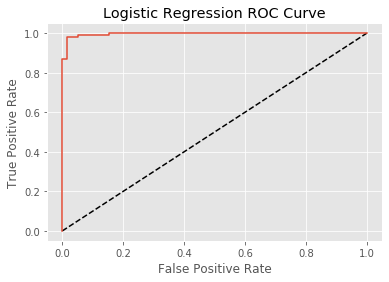

In [60]:
# Importing necessary modules
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')

y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Calling the roc_curve function and unpacking its outputs
fpr, tpr, thhresholds = roc_curve(y_test, y_pred_prob)

# Plotting FPR and TPR
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

<div style="text-align: justify">
In the previously shown plot, we used the predictive probabilities of the model assigning a value of 1 to the observation in question. This is due to the fact that to be able to compute the ROC we need more than the predictions on the test set. We need the probability that our logistic regression model outputs before using a threshold to predict the label as well. For this reason, the method .predict_proba() was implemented passing it the test data. This method returns an array with two columns, each contains the probabilities for the respective target values. The column that was chosen in this example was the second one with index 1 which contains the probabilities of the predicted labels being 1.
</div><br/>


### Exercise 3.2: Building a logistic regression model
<div style="text-align: justify">
Time to build your first logistic regression model! As shown in the previous section, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You will get to understand this as you train a logistic regression model on exactly the same data as in the previous exercise.
</div>

Instructions
1. Import the necessary modules
2. Create training and test sets with 40% (or 0.4) of the data used for testing. Use a random state of 42. This has been done for you.
3. Instantiate a LogisticRegression classifier called logreg.
4. Fit the classifier to the training data and predict the labels of the test set.
5. Compute and print the confusion matrix and classification report.

### Exercise 3.2: Solution

In [61]:
# Importing necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Loading diabetes dataset
df = pd.read_csv('data/diabetes.csv')
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

#Replacing nan values is dataset with the average of columns
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

# Obtaining values for target and features
y = df['diabetes']
X = df.drop('diabetes', axis=1)

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiating the logistic regression model
logreg = LogisticRegression(solver="liblinear")

# Fitting the classifier to the training data
logreg.fit(X_train,y_train)

# Predicting the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Computing and printing the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 35  67]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308



### Exercise 3.3: Plotting an ROC curve
<div style="text-align: justify">
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As demonstrated the previous section, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality. In this exercise, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.
</div><br/>

Instructions:
1. Import roc_curve from sklearn.metrics.
2. Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
3. Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
4. Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

### Exercise 3.3: Solution

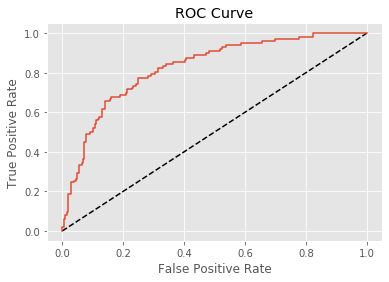

In [62]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# Loading diabetes dataset and eliminating nan values
df = pd.read_csv('data/diabetes.csv')
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

#Replacing nan values is dataset with the average of columns
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

# Obtaining values for target and features
y = df['diabetes']
X = df.drop('diabetes', axis=1)

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiating the logistic regression model
logreg = LogisticRegression(solver="liblinear")

# Fitting the classifier to the training data
logreg.fit(X_train,y_train)

# Computing predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Exercise 3.4: Precision-recall curve
<div style="text-align: justify">
When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:
</div><p><p/>

Precision or PPV = $\frac{tp}{tp+fp}$

<p><p/>

Recall = $\frac{tp}{tp+fn}$

<p><p/><div style="text-align: justify">
Displayed below is a precision-recall curve that has been generated for the diabetes dataset. Also, the classification report and confusion matrix is shown. Study the precision-recall curve and then consider the statements given below. Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes.
</div>

Possible Answers
- Option 1: A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
- Option 2: Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
- Option 3: When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.
- Option 4: Precision and recall take true negatives into consideration.

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308

[[176  30]
 [ 35  67]]


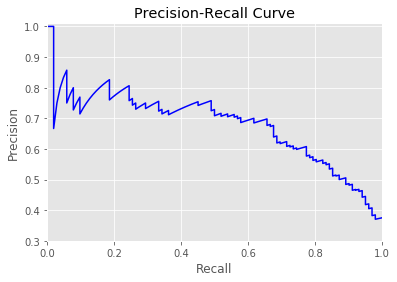

In [63]:
# Importing necesary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

# Loading diabetes dataset and eliminating nan values
df = pd.read_csv('data/diabetes.csv')
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

#Replacing nan values is dataset with the average of columns
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

# Obtaining values for target and features
y = df['diabetes']
X = df.drop('diabetes', axis=1)

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiating the logistic regression model
logreg = LogisticRegression(solver="liblinear")

# Fitting the classifier to the training data
logreg.fit(X_train,y_train)

# Predicting the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Computing predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Printing confusion matrix and classification report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Generating precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plotting precision recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.3, 1.01])
plt.title('Precision-Recall Curve')
plt.show()

### Exercise 3.4: Solution
Answer: Option 4

### Area under the ROC curve
<div style="text-align: justify">
Now the question to ask ourselves is the following: Given the ROC curve, can we extract a metric of interest? Consider the following, the larger the area under the ROC curve, the better the model. The way to think about this is the following: If we had a model which produced an ROC curve that had a single point at (1, 0), the upper left corner, representing a true positive rate of one and a false positive rate of zero then, this would be a great model. For this reason, the area under the ROC, also known AUC, is another metric popular method for classification models.
</div><br/>

<div style="text-align: justify">
To compute the AUC we execute the following steps:
</div>

1. Import the function roc_auc_score from sklearn
2. Instantiate the classifier
3. Split the data into train set and test set
4. Fit the model
5. Compute the predicted probabilities
6. Pass the true labels and the predicted probabilities to roc_auc_score

<div style="text-align: justify">
The following example implements logistic regression and computes the AUC using the diabetes dataset:
</div>

In [64]:
# Import the function roc_auc_score from sklearn
from sklearn.metrics import roc_auc_score

# Instantiate the classifier
logreg = LogisticRegression(solver="liblinear")

# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

# Compute the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Pass the true labels and the predicted probabilities to roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8255758614125261

<div style="text-align: justify">
The AUC can also be calculated by using cross-validation as follows:
</div>

1. Import cross_val_score from sklearn
2. Use cross_val_score and pass the estimator, the features, and the target to it. Also, set the keyword argument 'scoring' in cross_val_score to be equal to 'roc_auc'. Then, assign function output to a new variable.
3. Print the AUC list

<div style="text-align: justify">
The following example computes the AUC using cross-validation:
</div>

In [65]:
# Import the function cross_val_score from sklearn
from sklearn.model_selection import cross_val_score

# Call the cross_val_score function passing the estimator, the features, and the target to it,
# set the keyword argument 'scoring' in cross_val_score to be equal to 'roc_auc', and
# assign function output to cv_scores 
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print the AUC list
print(cv_scores)

[0.80185185 0.80666667 0.81481481 0.86245283 0.8554717 ]


### Exercise 3.5: AUC computation
<div style="text-align: justify">
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which was discussed in the previous section, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing.
</div><br/>

<div style="text-align: justify">
In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.
</div>

Instructions
1. Import roc_auc_score from sklearn.metrics and cross_val_score from sklearn.model_selection.
2. Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
3. Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
4. Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.

### Exercise 3.5: Solution

In [66]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8255758614125261
AUC scores computed using 5-fold cross-validation: [0.80185185 0.80666667 0.81481481 0.86245283 0.8554717 ]


### Hyperparameter tunning
<div style="text-align: justify">
Now that you have developed an understanding for how well a model is performing, we may discuss the methods through which a model's performance may be enhanced. We have seen that when fitting a linear regression which was basically the act of choosing parameters for the model that fit the data the best. We also saw that we had to choose a value for the alpha in the ridge and lasso regression before fitting it. Analogously, before fitting and predicting k-nearest neighbors, we had to choose n neighbors. These parameters that need to be specified before fitting a model are called hyperparameters. Thus, a fundamental key for building a successful model is choosing an appropriate hyperparameter. In other words, the key is to execute hyperparameter tunning.
</div><br/>

<div style="text-align: justify">
In hyperparameter tunning, different parameters are implemented and each one is used for a separate fitting process. Then, the parameter that produces the best performance in the model is selected. Note that when fitting different values of a hyperparameter, it is important to use cross-validation because using the train_test_split() function on its own would bring the risk of overfitting the hyperparameter to the test set.
</div><br/>

<div style="text-align: justify">
The basic idea is as to choose a grid of possible values we want to try for the hyperparameter or hyperparameters. For example, if we had two hyperparameters, C and alpha, the grid of values to test where rows refer to C and columns to alpha could look as follows:
</div>

|     |        |        |        |        |
|:---:|:------:|:------:|:------:|:------:|
|0.5  |0.701   |0.703   |0.697   |0.696   |
|0.4  |0.699   |0.702   |0.698   |0.702   |
|0.3  |0.721   |0.726   |0.713   |0.703   |
|0.2  |0.706   |0.705   |0.704   |0.701   |
|0.1  |0.698   |0.692   |0.688   |0.675   |
|     |0.1     |0.2     |0.3     |0.4     |

<div style="text-align: justify">
Once the grid of values has been devised, we perform k-fold cross-validation for each point in the grid and choose the hyperparameter that allows for the best model performance. This process is called grid search and can be implemented with scikit-learn by using the class GridSearchCV. The following steps are executed to implement GridSearchCV:
</div>

1. Import GridSearchCV from scikit-learn
2. Specify the hyperparameter as a dictionary in which the keys are the hyperparameter names
3. Instantiate the model
4. Use GridSearchCV and pass the model, the grid of values, and to number of folds to it. This returns a GridSearch object that you may fit to the data and this fit performs the grid search inplace.
5. Apply the attributes best_params_ and best_score_ to retrieve the hyperparameters that perform the best along with the mean cross-validation score over the fold.

<div style="text-align: justify">
The previously described steps are shown below.
</div>

In [67]:
# Load dataset
df = pd.read_csv('data/diabetes.csv')
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

# Obtain values for target and features
y = df['diabetes']
X = df.drop('diabetes', axis=1)

# Import modules
from sklearn.model_selection import GridSearchCV

# Specify the hyperparameter as a dictionary in which the keys are the hyperparameter names
param_grid = {'n_neighbors': np.arange(1, 50)}

# Instantiate the model
knn = KNeighborsClassifier()

# Use GridSearchCV and pass the model, the grid of values, and to number of folds to it.
# This returns a GridSearch object that you may fit to the data and this fit performs the grid search inplace.
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit model with the grid search inplace
knn_cv.fit(X, y)

# Retrieve the hyperparameters that perform the best along with the mean cross-validation score over the fold.
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 8}
0.7578125


### Exercise 3.6: Hyperparameter tunning with GridSearchCV
<div style="text-align: justify">
The previous section demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. Through this exercise you will do the same, but using logistic regression on the diabetes dataset instead. Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model. Your task is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.
</div>

Instructions
1. Import LogisticRegression from sklearn.linear_model and GridSearchCV from sklearn.model_selection.
2. Setup the hyperparameter grid by using c_space as the grid of values to tune C over.
3. Instantiate a logistic regression classifier called logreg.
4. Use GridSearchCV with 5-fold cross-validation to tune C:
5. Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
6. Use the .fit() method on the GridSearchCV object to fit it to the data X and y.
7. Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

### Exercise 3.6: Solution

In [71]:
# Loading dataset and obtaining target and feature variables
df = pd.read_csv('data/diabetes.csv')
y = df['diabetes']
X = df.drop('diabetes',axis=1)

# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver="liblinear")

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.7721354166666666


### Exercise 3.7: Hyperparameter tunning with RandomizedSearchCV
<div style="text-align: justify">
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.
</div><br/>

<div style="text-align: justify">
Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.
</div><br/>

<div style="text-align: justify">
Your main task is to use RandomizedSearchCV to find the optimal hyperparameters.
</div>

Instructions
1. Import DecisionTreeClassifier from sklearn.tree and RandomizedSearchCV from sklearn.model_selection.
2. Specify the parameters and distributions to sample from. This has been done for you.
3. Instantiate a DecisionTreeClassifier.
4. Use RandomizedSearchCV with 5-fold cross-validation to tune the hyperparameters:
5. Inside RandomizedSearchCV(), specify the classifier, parameter distribution, and number of folds to use.
6. Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y.
7. Print the best parameter and best score obtained from RandomizedSearchCV by accessing the best_params_ and best_score_ attributes of tree_cv.

### Exercise 3.7: Solution

In [72]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 7}
Best score is 0.7513020833333334


### Hold-out set for final evaluation
<div style="text-align: justify">
After using k-fold CV to tune a model's hyperparameters, you may want to report how well the model can be expected to perform on an unseen dataset using any chosen scoring function. You may want to use the model to predict on some labeled data, compare the prediction to the actual labels, and compute the scoring function. However, if all of the data was used for cross-validation, estimating the model's performance on any of the data may not provide an accurate representation on how well the model performs on unseen data. For this reason, it's important to split all of the data at the very beginning into a training set and a hold-out set. Then, cross-validation is performed on the trainning set to tune the model's hyperparameters. After executing hyperparameter tunning, the best hyperparameters may be selected and used on the hold-out set to test how well the model can be expected to perform on unseen data.
</div><br/>

### Exercise 3.8: Hold-out set reasoning
<div style="text-align: justify">
For which of the following reasons would you want to use a hold-out set for the very end?
</div>

Possible Answers
- Option 1: You want to maximize the amount of training data used.
- Option 2: You want to be absolutely certain about your model's ability to generalize to unseen data.
- Option 3: You want to tune the hyperparameters of your model.

### Exercise 3.8: Solution
Answer: Option 2

### Exercise 3.9: Hold-out set in practice I: Classification
<div style="text-align: justify">
You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y. In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.
</div>

Instructions
1. Create the hyperparameter grid:
2. Use the array c_space as the grid of values for 'C'.
3. For 'penalty', specify a list consisting of 'l1' and 'l2'.
4. Instantiate a logistic regression classifier.
5. Create training and test sets. Use a test_size of 0.4 and random_state of 42. In practice, the test set here will function as the hold-out set.
6. Tune the hyperparameters on the training set using GridSearchCV with 5-folds. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
7. Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

### Exercise 3.9: Solution

In [73]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver="liblinear")

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


C:\Users\amari\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Exercise 3.10: Hold-out set in practice II: Regression
<div style="text-align: justify">
Recalling lasso and ridge regression from the previous chapter, Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:
</div><p></p>

a∗L1+b∗L2

<p></p><div style="text-align: justify">
In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2. In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.
</div>

Instructions
1. Import the necessary modules
2. Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
3. Specify the hyperparameter grid for 'l1_ratio' using l1_space as the grid of values to search over.
4. Instantiate the ElasticNet regressor.
5. Use GridSearchCV with 5-fold cross-validation to tune 'l1_ratio' on the training data X_train and y_train. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
6. Predict on the test set and compute the R2 and mean squared error.

### Exercise 3.10: Solution

In [75]:
# Gapminder Countries GDP data
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df.drop(['life','Region'],axis=1).values

import warnings; warnings.filterwarnings('ignore')

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398441


## Chapter 4: Preprocessing and pipelines

### Preprocessing data
<div style="text-align: justify">
Now we will discuss how datasets are preprocessed which is an important step to be executed before building models. Say you are dealing with a dataset that categorical features, such as red or blue. Since these features are not numerical values, the scikit-learn API will not accept them and thus, they must be preprocessed into the correct format. This may be achieved by splitting the feature into a number of binary features called dummy variables, one for each category: 0 means that the observation was not that category, while 1 means that it was.
</div><br/>

<div style="text-align: justify">
For example, say that were dealing with a car dataset that has a 'origin' feature with three different possible values: US, Asia, and Europe as shown below.
</div>

In [76]:
df = pd.read_csv('data/auto.csv')
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


<div style="text-align: justify">
Thus, we must create binary features for each of the origins since each car is made in exactly one country. Note that in this case, if the car is not from the US and not from Asia, then implicitly, it is from Europe. Thus, only two separate features are needed. Otherwise, information duplication would occur which might be an issue for some models.
</div><br/>

<div style="text-align: justify">
There are several ways to create dummy variables in Python. In scikit-learn, the OneHotEncoder() fucntion may be used. In pandas, the get_dummies() function may be used. In the following example, the get_dummies() function will be used. The target variable in the example is miles per gallon (mpg) and the categorical feature 'origin' needs to be preprocessed. A boxplot showing how mpg varies by origin is shown below.
</div>

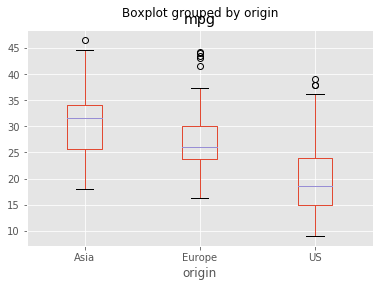

In [77]:
df.boxplot(column='mpg',by='origin');
plt.show()

<div style="text-align: justify">
Now we will encode the 'origin' feature using dummy variables by executing the following steps:
</div>

1. Import pandas
2. Read in the dataframe
3. Apply the get_dummies function

<div style="text-align: justify">
The previously mentioned steps are written as follows:
</div>

In [78]:
# Import pandas
import pandas as pd

# Read in the dataframe
df = pd.read_csv('data/auto.csv')

# Apply the get_dummies function and drop the first column for one of the binary features to avoid information duplication
df_origin = pd.get_dummies(df,drop_first=True)

# Print preprocessed dataframe
print(df_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Europe  origin_US
0  18.0  250.0   88    3139   14.5  15.0              0          1
1   9.0  304.0  193    4732   18.5  20.0              0          1
2  36.1   91.0   60    1800   16.4  10.0              0          0
3  18.5  250.0   98    3525   19.0  15.0              0          1
4  34.3   97.0   78    2188   15.8  10.0              1          0


<div style="text-align: justify">
Once we have created our dummy variables, we can fit models as before. In the following example, we fit the ridge regression model to the data and compute its R<sup>2</sup>.
</div>

In [79]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Load feature and target variables
X=df_origin.drop(['mpg'],axis=1)
y=df_origin['mpg']

# Split dataset into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Instantiate ridge model and fit the model to the train set
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train,y_train)

# Evaluate the model's performance
ridge.score(X_test, y_test)

0.7190645190217895

### Exercise 4.1: Exploring categorical features
<div style="text-align: justify">
The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature. Your task in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.
</div>

Instructions
1. Import pandas as pd.
2. Read the CSV file 'gapminder.csv' into a DataFrame called df.
3. Use pandas to create a boxplot showing the variation of life expectancy ('life') by region ('Region'). To do so, pass the column names in to df.boxplot() (in that order).

### Exercise 4.1: Solution

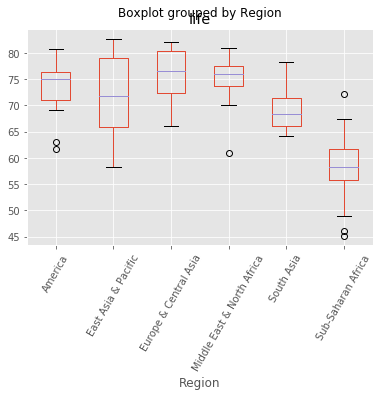

In [80]:
# Gapminder Countries GDP data
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

### Exercise 4.2: Creating dummy variables
<div style="text-align: justify">
As discussed in the previous section, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.
</div>

Instructions:
1. Use the pandas get_dummies() function to create dummy variables from the df DataFrame. Store the result as df_region.
2. Print the columns of df_region. This has been done for you.
3. Use the get_dummies() function again, this time specifying drop_first=True to drop the unneeded dummy variable (in this case, 'Region_America').
4. Hit 'Submit Answer to print the new columns of df_region and take note of how one column was dropped!

### Exercise 4.2: Solution

In [81]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [82]:
# Create arrays for features and target variable
y = df_region['life']
X = df_region.drop(['life'],axis=1)
X.shape, y.shape

((139, 13), (139,))

### Exercise 4.3: Regression with categorical features
<div style="text-align: justify">
Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.
</div>

Instructions
1. Import Ridge from sklearn.linear_model and cross_val_score from sklearn.model_selection.
2. Instantiate a ridge regressor called ridge with alpha=0.5 and normalize=True.
3. Perform 5-fold cross-validation on X and y using the cross_val_score() function.
4. Print the cross-validated scores.

### Exercise 4.3: Solution

In [83]:
import pandas as pd
mlb = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/intro_to_python/baseball.csv")

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5,normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


### Handling missing data
<div style="text-align: justify">
Data is said to be missing when there is no value for a given feature in a particular row. This can occur in the real world for many reasons such as the lack of an observations, a transcription error, data corruption. Now we will load the PIMA Indians dataset as shown below.
</div>

In [84]:
# PIMA Indians dataset
df = pd.read_csv('data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<div style="text-align: justify">
It doesn't look like it has any missing values since the df.info() function specifies that all features have 768 non-null entries. However, missing values can be encoded in various ways such as by 0's, question marks, or -1's. If the df.head() function is called, it may be observed that there were observations where the insulin and triceps was zero. These observations are not possible and in this case, data is missing as shown below.
</div>

In [85]:
print(df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


<div style="text-align: justify">
Before going any further, these missing entries will be changed to 'NaN' by using the .replace() method on the relevant columns as shown below.
</div>

In [86]:
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


<div style="text-align: justify">
One way of dealing with this missing data is to drop all rows containing missing data by using pandas' dataframe method dropna as shown below.
</div>

In [87]:
df = df.dropna()
print(df.shape)

(393, 9)


<div style="text-align: justify">
After implementing the .dropna() method it may be observed that approximately half of the data has been lost and this is unacceptable. If only a few rows contain missing values, the .dropna() method does not cause any damage. But generally a more robust method is needed for this kind of situation.
</div><br/>

<div style="text-align: justify">
Another option is to impute missing data which is the act of making an educated guess as to what the missing values could be. A common strategy when imputing is to compute the mean of all the non-missing entries for any given column with missing values and to replace all the missing values with the mean as shown below.
</div>

In [88]:
# Import imputer from scikit-learn
from sklearn.preprocessing import Imputer

# Read dataframe
df = pd.read_csv('data/diabetes.csv')

# Obtain target and feature variables
y = df['diabetes']
X = df.drop('diabetes',axis=1)

# Instantiate imputer as imp,
# specify that the missing values are represented by 'Nan'
# use the mean strategy as previously described, and
# set the axis to 0 to specify that we will impute along columns (a 1 would mean rows)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Fit imputer to the data using the .fit() method
imp.fit(X)

# Transform the data using the .tranform() method
X = imp.transform(X)

<div style="text-align: justify">
Due to their ability to transform data, imputers are known as transformers. Also, any model that can transform data this way, using the transform method is called a transformer. After transforming the data, we can then fit the supervised learning model to said data. However, there is also a way to execute both transformation and fitting at once by using the scikit-learn pipeline object and executing the following steps:
</div>

1. Import pipeline and imputer from scikit-learn
2. Instantiate imputer
3. Instantiate a logistic regression model
4. Build the pipeline object. Construct a list of steps in the pipeline, where each step is a 2-tuple containing the step's name and the estimator
5. Pass list to the pipeline constructor
6. Split the data into train and test set
7. Fit the pipeline to the training set
8. Predict on the test set
9. Compute accuracy

<div style="text-align: justify">
The previously described steps are shown below.
</div>

In [89]:
# Pipeline: All steps before last must be transformers (like impute)
# Pipeline: Last step can be transformer or estimator (like classifier/regressor)

# Import pipeline and imputer from scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

# Instantiate imputer as imp,
# specify that the missing values are represented by 'Nan'
# use the mean strategy as previously described, and
# set the axis to 0 to specify that we will impute along columns (a 1 would mean rows)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Instantiate a logistic regression model
logreg = LogisticRegression(solver='lbfgs')

# Build the pipeline object. Construct a list of steps in the pipeline, 
# where each step is a 2-tuple containing the step's name and the estimator
steps = [('imputation', imp),('logistic_regression', logreg)]

# Pass list to the pipeline constructor
pipeline = Pipeline(steps)

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Fit the pipeline to the training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Compute accuracy
pipeline.score(X_test, y_test)

0.7402597402597403

<div style="text-align: justify">
Note that in a pipeline, each step but the last must be a transformer and the last must be an estimator such as a classifier or a regressor.
</div>

### Exercise 4.4: Dropping missing data
<div style="text-align: justify">
In this exercise, your task is to convert the '?'s to NaNs in the voting dataset, and then drop the rows that contain them from the DataFrame.
</div>

Instructions
1. Explore the DataFrame df in the IPython Shell. Notice how the missing value is represented.
2. Convert all '?' data points to np.nan.
3. Count the total number of NaNs using the .isnull() and .sum() methods. This has been done for you.
4. Drop the rows with missing values from df using .dropna().
5. Hit 'Submit Answer' to see how many rows were lost by dropping the missing values.

### Exercise 4.4: Solution

In [90]:
# Dropping missing data

df = pd.read_csv('data/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1},inplace=True)

In [91]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


### Exercise 4.5: Imputing missing data in a ML Pipeline I
<div style="text-align: justify">
As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.
</div><br/>


<div style="text-align: justify">
You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.
</div>

Instructions
1. Import Imputer from sklearn.preprocessing and SVC from sklearn.svm. SVC stands for Support Vector Classification, which is a type of SVM.
2. Setup the Imputation transformer to impute missing data (represented as 'NaN') with the 'most_frequent' value in the column (axis=0).
3. Instantiate a SVC classifier. Store the result in clf.
4. Create the steps of the pipeline by creating a list of tuples:
5. The first tuple should consist of the imputation step, using imp.
6. The second should consist of the classifier.

### Exercise 4.5: Solution

In [92]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),('SVM', clf)]

### Exercise 4.6: Imputing missing data in a ML Pipeline II
<div style="text-align: justify">
Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors.
</div><br/>

<div style="text-align: justify">
Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array X and target variable array y have been pre-loaded. Additionally, train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics respectively.
</div>

Instructions
1. Import the necessary modules
2. Create the pipeline using Pipeline() and steps.
3. Create training and test sets. Use 30% of the data for testing and a random state of 42.
4. Fit the pipeline to the training set and predict the labels of the test set.
5. Compute the classification report.

### Exercise 4.6: Solution

In [93]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



### Centering and scaling
<div style="text-align: justify">
Data imputation is one the of several important preprocessing techniques for machine learning. In this section, another preprocessing technique will be covered known as centering and scaling. To discuss this technique we will work with the wine quality database whose description and head is shown below.
</div>

In [94]:
df = pd.read_csv('data/winequality-red.csv',header=0,sep=';')
print(df.describe(), '\n\n')
print(df.head())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<div style="text-align: justify">
From the describe function, the ranges of the feature variables may be observed. The features are chemical properties such as: acidity, pH, and alcohol content. Then, the target value is good (1) or bad (0). The ranges can be seen to vary widely: the 'density' feature varies from 0.99 to 1 and the 'total sulfur dioxide' feature varies from 6 to 289. Many machine learning models use some form of distance to inform them. Thus, if we are dealing with features that are on far larger scales than other features, the model can be influenced erroneously. For example, KNN uses distance explicitly to make predictions. For this reason, we want features to be on a similar scale. This can be achieve by normalizing or scaling and centering.
</div><br/>

<div style="text-align: justify">
There are several ways to normalize your data given any column such as subtracting the mean and dividing it by the variance so that all features are centered around zero and have variance one. This method is called standarization. Data may also be normalized by subtracting the minimum and dividing by the range of the data so that the normalized dataset has a minimum zero and a maximum one. Also, normalization may be executed such that the data ranges from -1 to 1 instead. This section will focus on the standarization normalization technique which includes the following steps:
</div><br/>

1. Import scale from scikit-learn
2. Call the scale function and pass the feature data to it

<div style="text-align: justify">
The previously described steps are shown below.
</div>

In [95]:
#Obtaining target and features variables
X = df.drop('quality',axis=1).values
y = df['quality'].values

# Import scale from scikit-learn
from sklearn.preprocessing import scale

# Call the scale function and pass the feature data to it
X_scaled = scale(X)

# Compare the mean and standard deviation of the columns of both the original and scaled data
print('Original data:\n', 'Mean: ', np.mean(X), '\n Standard deviation: ', np.std(X))
print('\nScaled data:\n', 'Mean: ', np.mean(X_scaled), '\n Standard deviation: ', np.std(X_scaled))

Original data:
 Mean:  8.134219224515322 
 Standard deviation:  16.726533979432848

Scaled data:
 Mean:  2.546626531486538e-15 
 Standard deviation:  1.0


<div style="text-align: justify">
From another point of view, a scalar may also be implemented on a pipeline object. This includes the following steps:
</div>

1. Import StandardScaler from scikit-learn
2. Build a pipeline object
3. Split dataset into train and test set
4. Fit the pipeline to the train set
5. Predict on the test set

<div style="text-align: justify">
The previously described steps are shown below.
</div>

In [96]:
# Import modules
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Build pipeline object
steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Fit the pipeline to the train set
knn_scaled = pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Extra step: Compute accuracy of model using scaled data
print('Accuracy using scaled data: ', accuracy_score(y_test, y_pred))

# Extra step: Compupte accuracy of model using unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print('Accuracy using unscaled data: ', knn_unscaled.score(X_test, y_test))

Accuracy using scaled data:  0.615625
Accuracy using unscaled data:  0.49375


<div style="text-align: justify">
It's important to note that cross-validation may also be implemented on a pipeline with scaling. This includes the following steps:
</div>

1. Build a pipeline object
2. Specify the hyperparameter space by cretaing a dictionary where the keys are the pipeline step name followed by a double underscore, followed by the hyperparameter name. Then, the corresponding value is a list or an array of the values to try for that particular hyperparameter.
3. Split dataset into cross-validation and hold-out sets
4. Instantiate the GridSearchCV object
5. Fit GridSearchCV object to the cross-validation set
6. Predict on the estimator with the best found parameters using the hold-out set

<div style="text-align: justify">
The previously described steps are shown below.
</div>

In [97]:
# Build a pipeline object
steps = [('scaler', StandardScaler()),(('knn', KNeighborsClassifier()))]
pipeline = Pipeline(steps)

# Specify the hyperparameter space by cretaing a dictionary where the keys are the pipeline step name 
# followed by a double underscore, followed by the hyperparameter name. 
parameters = {'knn__n_neighbors':np.arange(1, 50)}

# Split dataset into cross-validation and hold-out sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit GridSearchCV object to the cross-validation set
cv.fit(X_train, y_train)

# Predict on the estimator with the best found parameters using the hold-out set
y_pred = cv.predict(X_test)

# Extra step: Print the best parameters chosen by the grid search
print(cv.best_params_)

# Extra step: Print accuracy
print('\n', cv.score(X_test, y_test))

# Extra step: Print classification report
print('\n', classification_report(y_test, y_pred))

{'knn__n_neighbors': 1}

 0.634375

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.18      0.12      0.15        16
           5       0.66      0.72      0.69       127
           6       0.68      0.60      0.64       131
           7       0.63      0.69      0.66        42
           8       0.25      0.33      0.29         3

    accuracy                           0.63       320
   macro avg       0.40      0.41      0.40       320
weighted avg       0.63      0.63      0.63       320



### Exercise 4.7: Centering and scaling your data
<div style="text-align: justify">
In the previous section, we observed how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.
</div><br/>

<div style="text-align: justify">
You will now explore scaling for yourself on the wine dataset. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0. Notice that some features in the wine dataset seem to have different units of measurement. The 'density' feature, for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your task in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.
</div>

Instructions
1. Import scale from sklearn.preprocessing.
2. Scale the features X using scale().
3. Print the mean and standard deviation of the unscaled features X, and then the scaled features X_scaled. Use the numpy functions np.mean() and np.std() to compute the mean and standard deviations.

### Exercise 4.7: Solution

In [100]:
# White wine quality dataset.
df = pd.read_csv('data/white-wine.csv')
y = df.quality < 5
X = df.drop('quality',axis=1).values

# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


### Exercise 4.8: Centering and scaling in a pipeline
<div style="text-align: justify">
With regard to whether or not scaling is effective, the proof is evident. See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.
</div>

Instructions
1. Import the necessary modules
2. Complete the steps of the pipeline with StandardScaler() for 'scaler' and KNeighborsClassifier() for 'knn'.
3. Create the pipeline using Pipeline() and steps.
4. Create training and test sets, with 30% used for testing. Use a random state of 42.
5. Fit the pipeline to the training set.
6. Compute the accuracy scores of the scaled and unscaled models by using the .score() method inside the provided print() functions.

### Exercise 4.8: Solution

In [101]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


### Exercise 4.9: Bringing it all together I: Pipeline for classification
<div style="text-align: justify">
It is time now to piece together everything you have learned so far into a pipeline for classification. Your task in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality. You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.
</div>

Instructions
1. Setup the pipeline with the following steps:
2. Scaling, called 'scaler' with StandardScaler().
3. Classification, called 'SVM' with SVC().
4. Specify the hyperparameter space using the following notation: 'step_name__parameter_name'. Here, the step_name is SVM, and the parameter_names are C and gamma.
5. Create training and test sets, with 20% of the data used for the test set. Use a random state of 21.
5. Instantiate GridSearchCV with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
6. Predict the labels of the test set and compute the metrics. The metrics have been computed for you.

### Exercise 4.9: Solution

In [103]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       951
        True       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


### Exercise 4.10: Bringing it all together I: Pipeline for classification
<div style="text-align: justify">
For this final exercise, you will return to the Gapminder dataset. Your task is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.
</div>

Instructions
- Set up a pipeline with the following steps:
 - 'imputation', which uses the Imputer() transformer and the 'mean' strategy to impute missing data ('NaN') using the mean of the column.
 - 'scaler', which scales the features using StandardScaler().
 - 'elasticnet', which instantiates an ElasticNet() regressor.
- Specify the hyperparameter space for the l1 ratio using the following notation: 'step_name__parameter_name'. Here, the step_name is elasticnet, and the parameter_name is l1_ratio.
- Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
- Instantiate GridSearchCV with the pipeline and hyperparameter space. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
- Fit the GridSearchCV object to the training set.
- Compute R2 and the best parameters. This has been done for you, so hit 'Submit Answer' to see the results!

### Exercise 4.10: Solution

In [104]:
# Load dataset and obtain target and feature variables
df = pd.read_csv('data/gm_2008_region.csv')
y = df['life'].values
X = df.drop(['life','Region'],axis=1).values

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


### Final thoughts
<div style="text-align: justify">
This workshop has discussed the following concepts:
</div>

- Machine learning techniques to build predictive models
- Regression and classification problems
- Underfitting and overfitting
- Test train split
- Cross validation
- Grid search